# ITS307 Data Analytics : Autumn Semester 2022

# Lecture 3

# Data Wrangling with pandas


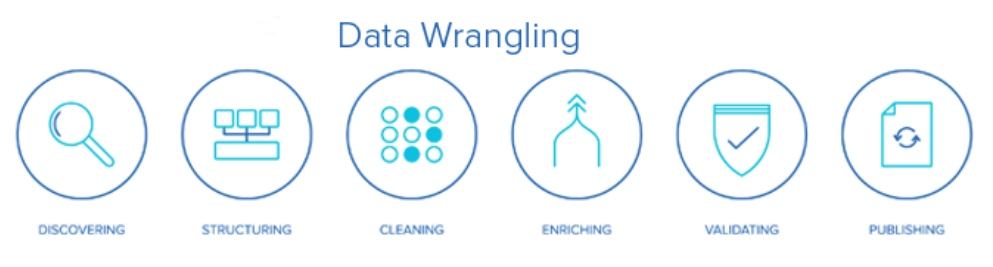

# 1. Duplicated data

## <font color="green">1.1 Check Duplicates records

`DataFrame.duplicated(subset=None, keep='first')`

In [4]:
#load data and check if your data contain any duplicates
import pandas as pd
df = pd.read_excel("yelp.xlsx")
df.head()


C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


name   category_0       category_1  take_out  review_count  stars  city_id  state_id
0  China Sea Chinese Restaurant  Restaurants          Chinese      True          11.0    2.5        1         1
1          Discount Tire Center        Tires       Automotive     False          24.0    4.5        1         1
2                  Frankfurters  Restaurants         Hot Dogs      True           3.0    4.5        1         1
3             Fred Dietz Floral     Shopping  Flowers & Gifts     False           6.0    4.0        1         1
4                 Kuhn's Market         Food          Grocery     False           8.0    3.5        1         1

In [9]:
df.duplicated().sum()

0

In [16]:
#Use subset parameters to check if there is any duplicate business name
df.duplicated(subset = ['name']).sum()


34

## <font color="green">1.2. Drup Duplicates
    
`DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)`

In [47]:
# use drop_duplicates() method to drop all duplicate business names
drop = df.drop_duplicates(subset = ['name'], inplace = True)

# 2. Missing Values

##  <font color=green>2.1. Check Missing values
    
`DataFrame.isna()` or `DataFrame.isnull()` Detect missing values.
    
    
Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values. Characters such as empty strings '' or numpy.inf are not considered NA values

In [24]:
# Use isna() and isnull() method to check null values in dataframe
df.isna()



name  category_0  category_1  take_out  review_count  stars  city_id  state_id
0    False       False       False     False         False  False    False     False
1    False       False       False     False         False  False    False     False
2    False       False       False     False         False  False    False     False
3    False       False       False     False         False  False    False     False
4    False       False       False     False         False  False    False     False
..     ...         ...         ...       ...           ...    ...      ...       ...
594  False       False       False     False         False  False    False     False
595  False       False       False     False         False  False    False     False
596  False       False       False     False         False  False    False     False
598  False       False       False     False         False  False    False     False
599  False       False       False     False         False  False    False     False

[566 rows x 8 columns]

In [25]:
df.isnull()

name  category_0  category_1  take_out  review_count  stars  city_id  state_id
0    False       False       False     False         False  False    False     False
1    False       False       False     False         False  False    False     False
2    False       False       False     False         False  False    False     False
3    False       False       False     False         False  False    False     False
4    False       False       False     False         False  False    False     False
..     ...         ...         ...       ...           ...    ...      ...       ...
594  False       False       False     False         False  False    False     False
595  False       False       False     False         False  False    False     False
596  False       False       False     False         False  False    False     False
598  False       False       False     False         False  False    False     False
599  False       False       False     False         False  False    False     False

[566 rows x 8 columns]

#### <font color=red> Question 1: Which columns contains missing values? Mention how many record are missing in each columns.

In [36]:
## Write your answer here
df.isna().sum()


name            0
category_0      0
category_1      0
take_out        0
review_count    0
stars           0
city_id         0
state_id        0
dtype: int64

## <font color=green>2.2. Handle Missing Values
    
- Remove Missing values if your number of records with missing values are less.
    
    
- Source Missing information manually.
    
    
- Imputation - imputation is the process of replacing missing data with substituted values. 
    
    `Note: Use either pandas or sklearn to perform imputation`

### <font color=blue>2.2.1. Using pandas for Imputation
    
`DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)`

In [45]:
# Use fillna() method to fill null values with 0. 
df.fillna(value = 0)


name      category_0  ... city_id  state_id
0                         China Sea Chinese Restaurant     Restaurants  ...       1         1
1                                 Discount Tire Center           Tires  ...       1         1
2                                         Frankfurters     Restaurants  ...       1         1
3                                    Fred Dietz Floral        Shopping  ...       1         1
4                                        Kuhn's Market            Food  ...       1         1
..                                                 ...             ...  ...     ...       ...
594                                     Domino's Pizza      Sandwiches  ...      13         2
595  Republic Services of Southern Nevada Recycling...  Local Services  ...      13         2
596                                       SA Recycling  Local Services  ...      13         2
598                               Custom Hearth & Door        Shopping  ...      13         2
599                                   A Sunrise Towing      Automotive  ...      13         2

[566 rows x 8 columns]

In [46]:
#Check if you have any more null values
df.isna().sum()

name            0
category_0      0
category_1      0
take_out        0
review_count    0
stars           0
city_id         0
state_id        0
dtype: int64

`DataFrame.ffill(axis=None, inplace=False, limit=None, downcast=None)` - Synonym for DataFrame.fillna() with method='ffill

`DataFrame.bfill(axis=None, inplace=False, limit=None, downcast=None)` - Synonym for DataFrame.fillna() with method='bfill

### <font color = blue>2.2.2. Using sklearn for Imputation
    
`class sklearn.impute.SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, verbose='deprecated', copy=True, add_indicator=False)`

`DataFrame.select_dtypes(include=None, exclude=None)`

In [48]:
myDf= pd.read_excel("yelp.xlsx")

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [53]:
ndf = myDf.select_dtypes(include = ['int64','float64'])
ndf.head()

review_count  stars  city_id  state_id
0          11.0    2.5        1         1
1          24.0    4.5        1         1
2           3.0    4.5        1         1
3           6.0    4.0        1         1
4           8.0    3.5        1         1

In [55]:
cdf = myDf.select_dtypes(include = ['object', 'bool'])
cdf

name      category_0                       category_1  take_out
0                         China Sea Chinese Restaurant     Restaurants                          Chinese      True
1                                 Discount Tire Center           Tires                       Automotive     False
2                                         Frankfurters     Restaurants                         Hot Dogs      True
3                                    Fred Dietz Floral        Shopping                  Flowers & Gifts     False
4                                        Kuhn's Market            Food                          Grocery     False
..                                                 ...             ...                              ...       ...
595  Republic Services of Southern Nevada Recycling...  Local Services                 Recycling Center     False
596                                       SA Recycling  Local Services                 Recycling Center     False
597                                    Jack In the Box     Restaurants                        Fast Food      True
598                               Custom Hearth & Door        Shopping  Heating & Air Conditioning/HVAC     False
599                                   A Sunrise Towing      Automotive                           Towing     False

[600 rows x 4 columns]

In [58]:
#Use simpleImputer to impute missing values
from sklearn.impute import SimpleImputer
imputeN = SimpleImputer()
nData = imputeN.fit_transform(ndf)
nData


array([[11. ,  2.5,  1. ,  1. ],
       [24. ,  4.5,  1. ,  1. ],
       [ 3. ,  4.5,  1. ,  1. ],
       ...,
       [12. ,  3. , 13. ,  2. ],
       [ 9. ,  4. , 13. ,  2. ],
       [ 4. ,  1. , 13. ,  2. ]])

In [63]:
adf = pd.DataFrame(nData, columns = ndf.columns)
adf.isna().sum()

review_count    0
stars           0
city_id         0
state_id        0
dtype: int64

# 3. Type Conversion

`DataFrame.astype(dtype, copy=True, errors='raise')`

`Series.astype(dtype, copy=True, errors='raise')`

In [38]:
# Use dataframe astype method and series astype methods to convert column type to another type.

